# Prediction of term deposit subscription

## 1. Business Problem Understanding

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## 2. Data Understanding

**[FILE USED]**
<BR>
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
<br>
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

**[VARIABLE DESCRIPTION]**
<br>
1 - age : client's age(numeric)
<br>
2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
<br>
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
<br>
4 - education : (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
<br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
<br>
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
<br>
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
<br>
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>
<br>
**[TARGET DESCRIPTION]**
<br>
1 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**[FEATURE]**
<br>
Categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome
<br>
Numeric: age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed (duration excluded due to its highly affect to target)

**[TARGET]**
<br>
y (0 or 1)

## 3. Data Preparation

### 3.1 Import the libraries and read the data needed

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the all the files needed and assign them into variables. We use bank-additional-full and bank-additional because variable in bank-full and bank didn't explained 

In [5]:
baf = pd.read_csv('bank-additional-full.csv')
ba = pd.read_csv('bank-additional.csv')

We need to change the target to 0 or 1 so the algorithm can understand the data

In [6]:
baf['y'] = baf['y'].apply(lambda x: 1 if x == 'yes' else 0)
ba['y'] = ba['y'].apply(lambda x: 1 if x == 'yes' else 0)

### 3.2 Explore the basic statistics of the data

In [ ]:
baf.head().transpose()

Find out about the data type

In [ ]:
baf.info()

In [ ]:
baf.describe().transpose()

From the basic statiscs and information about the dataset, there are 2 types of feature: numeric and categorical.

### 3.3 Exploratory Data Analysis

What I want to see first is if the group of term-subscriber and not subscriber is balance or not

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='y',data = baf)
plt.xlabel('y')
plt.title('Distribution of y')

It seems the distribution heavily concentrated on not subscriber

#### 3.3.1 Numerical Feature

**[Pdays]**
<br>
In statistics basic info, there is something strange with the **'pdays'** feature. The 25%, 50%,  75% quartile shows exact same value 999 (could be seen in distribution above) which means almost all proportion is 999. It seems **whether a customer subscribe a term-deposit or not is less likely affected by the days passed by after the client was last contacted from a previous campaign**

In [ ]:
baf['pdays'].plot.hist()

Because mostly the data value is 999, I think there is not much difference between 1 day of ago, or 2 days, or 3 days, or etc. So I will divide them into 2 new groups, the ones that have called by bank, and the ones that haven,t.

In [ ]:
baf['pdays'] = baf['pdays'].apply(lambda x: 'Not Called' if x == 999 else 'Called')

**[Age]**
<br>
The average customer's age is around 35-40 and it make sense because bank will more likely contact people who mature enough to think about future investment, plus it is a low-risk investment and mature people more prefer this kind of investment rather than young people.

In [ ]:
plt.figure(figsize=(8,6))
baf[baf['y']==0]['age'].hist(alpha=0.5,color='red',bins=20,label='y=0')
baf[baf['y']==1]['age'].hist(alpha=0.5,color='blue',bins=20,label='y=1')
plt.title("Customer's Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

If we see the age separated based on whether the customer subscribing or no, the distributions are so overlapping! Even their mean value difference merely less than 10! I think this shows that age doesn't separate the group well enough.

**[Campaign]**
<br>
Number of contacts performed during this campaign and for this client mostly less than 5 and it makes sense because we shouldn't contact same people for campaigning our progroam for many times. The outliers shows it even reaches 50

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(baf['campaign'],kde=False)
plt.title('How many times people contacted during the campaign')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

In [ ]:
baf[baf['campaign'] > 12]['campaign'].sum()

**[Previous]**
<br>
Most of the client didn't contacted before this campaign, so I will look whether number of contact performed in previous campaign affect the customer to subsribe the term-deposit or not by seeing distribution of people who subscribed and have contacted before

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(baf['previous'],kde=False)
plt.title('Customers based on previous contact')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

I will divide them into 2 groups, the one haven't contacted in the previous campaign, and the ones who contacted.

In [ ]:
baf['previous'] = baf['previous'].apply(lambda x: 'Not contacted in prev camp' if x == 0 else 'Contacted in prev camp')

**[Consumer Confidence Index]**
<br>
Because it is a monthly indicator, the graph shows when is the people tend to subsribe term-deposit. Looks like no significant trend there

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(baf['cons.conf.idx'],kde=False)
plt.title('Term-deposit Subscriber Based on Customer Confidence Index')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')

#### 3.3.2 Categorical Feature

For categorical features, I will explore the distribution of term-deposit subscriber and non subscriber in every categorical feature. I will also calculate the rate which define proportional of term deposit subscriber of customer in every category.

**[Job]**

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['job','y']].groupby('job').count())
df2 = pd.DataFrame(baf[baf['y']==1][['job','y']].groupby('job').count())
df3 = pd.DataFrame(baf[['job','y']].groupby('job').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='job')
df = pd.merge(df,df3, how='outer', on='job')
df.columns=['y=0','y=1','Total']
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)
df.fillna(0,inplace=True)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['red','blue'],figsize=(15,7),width=0.7,legend=9)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Job')

The average for term-deposit subscriber per category in job is ranged between 0.05-0.15. But we can see there is such an anomaly for 2 specific jobs, they are retired and student! It shows that it could be a good predictor seems people whose are retired or students will be more likely to subscribe term-deposit
<br>
<br>
Anyway, if you think the student rate raise because the sample amount is too small, but I don't have the confidence to exclude it because when I look at the other categories who have similiar sample amount (entrepreneur, self-employed,housemaid,unemployed) they don't show this significant rate like Student

**[Marital]**
<br>
Seems that for **unknown** category have too small amount of sample and this will be a pitfall when we use WoE (Weight of Evidence) for this categorical feature so it could give  us wrong value of IV for **marital** feature, so I will remove it

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['marital','y']].groupby('marital').count())
df2 = pd.DataFrame(baf[baf['y']==1][['marital','y']].groupby('marital').count())
df3 = pd.DataFrame(baf[['marital','y']].groupby('marital').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='marital')
df = pd.merge(df,df3, how='outer', on='marital')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(6,4),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Marital')

**[Education]**
<br>
Seems that for **illiterate** category have too small amount of sample and this will be a pitfall when we use WoE (Weight of Evidence) for this categorical feature. Basically, by rule of thum we need at least 5% of the data for each bin. I will show you what this small amount

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['education','y']].groupby('education').count())
df2 = pd.DataFrame(baf[baf['y']==1][['education','y']].groupby('education').count())
df3 = pd.DataFrame(baf[['education','y']].groupby('education').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='education')
df = pd.merge(df,df3, how='outer', on='education')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(15,7),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Education')

The graph shows significant high rate for **illiterate** right, even if the term-deposit subscriber people whose education is included in illiterate only 4 people but it is 4 out of 18. And by business logically, it doesn't make sense when illiterate people have much higher proportion of term-deposit subscriber than the ones who are educated

**[Default]**
<br>
The other rule of WoE binning is every binning have to has event observation and non-event observation. Since no term deposit subscriber has default, it means the 'yes' category doesn't have event observation

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['default','y']].groupby('default').count())
df2 = pd.DataFrame(baf[baf['y']==1][['default','y']].groupby('default').count())
df3 = pd.DataFrame(baf[['default','y']].groupby('default').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='default')
df = pd.merge(df,df3, how='outer', on='default')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(6,4),width=0.5)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Default')

**[Housing]**
<br>
No significant range change between each category, and this means it wont lead to any wrong information value. Also the distribution still make sense using the business logic.

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['housing','y']].groupby('housing').count())
df2 = pd.DataFrame(baf[baf['y']==1][['housing','y']].groupby('housing').count())
df3 = pd.DataFrame(baf[['housing','y']].groupby('housing').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='housing')
df = pd.merge(df,df3, how='outer', on='housing')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(6,4),width=0.5)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Housing')

**[Loan]**
<br>
Same like housing, there is no significant change that will lead to any wrong IV. The distribution still make sense using the business logic (the ones who having loan wouldn't prefer to subsribe term deposit and pay-off their loan first\

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['loan','y']].groupby('loan').count())
df2 = pd.DataFrame(baf[baf['y']==1][['loan','y']].groupby('loan').count())
df3 = pd.DataFrame(baf[['loan','y']].groupby('loan').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='loan')
df = pd.merge(df,df3, how='outer', on='loan')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['yellow','black'],figsize=(6,4),width=0.5)
df['rate'].plot(secondary_y=True,color='red',legend=True,linewidth=3)
plt.title('Loan')

**[Contact]**
<br>
Term-deposit subscriber concentrated on people who contacted by cell-phone

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['contact','y']].groupby('contact').count())
df2 = pd.DataFrame(baf[baf['y']==1][['contact','y']].groupby('contact').count())
df3 = pd.DataFrame(baf[['contact','y']].groupby('contact').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='contact')
df = pd.merge(df,df3, how='outer', on='contact')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['skyblue','pink'],figsize=(6,4),width=0.4)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Contact')

**[Month]**
<br>
The distribution of term deposit subscriber based customer's month when contacted  is well-distributed and not concentrated on a particular month

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['month','y']].groupby('month').count())
df2 = pd.DataFrame(baf[baf['y']==1][['month','y']].groupby('month').count())
df3 = pd.DataFrame(baf[['month','y']].groupby('month').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='month')
df = pd.merge(df,df3, how='outer', on='month')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['skyblue','purple'],figsize=(15,7),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Month')

**[Day of Week]**
<br>
The distribution of term deposit subscriber based customer's day of week contacted is well-distributed. It won't be a good feature.

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['day_of_week','y']].groupby('day_of_week').count())
df2 = pd.DataFrame(baf[baf['y']==1][['day_of_week','y']].groupby('day_of_week').count())
df3 = pd.DataFrame(baf[['day_of_week','y']].groupby('day_of_week').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='day_of_week')
df = pd.merge(df,df3, how='outer', on='day_of_week')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['magenta','yellow'],figsize=(12,4),width=0.5)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Month')

**[Poutcome]**
<br>
Outcome of the previous marketing campaign related well enough with subscriber term-deposit

In [ ]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['poutcome','y']].groupby('poutcome').count())
df2 = pd.DataFrame(baf[baf['y']==1][['poutcome','y']].groupby('poutcome').count())
df3 = pd.DataFrame(baf[['poutcome','y']].groupby('poutcome').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='poutcome')
df = pd.merge(df,df3, how='outer', on='poutcome')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['red','yellow'],figsize=(15,7),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3)
plt.title('Poutcome')

#### 3.3.3 Feature Engineering

In this section, I will do some feature engineering. I will reduce some feature using **Weight of Evidence** and **Information Value** method. The method tells the predictive power of an independent variable in relation to the dependent variable. This method will give the predictive power (information value) for each category. It also handle my categorical feature by change it into numbers so the algorithm could understand the input. Before entering WoE and IV, I will prepare the data first. One of the rule of WoE is the bin/value of feature can't have too small amount of observation. So I will remove them and treat them as noise

In [7]:
baf = baf[baf['default'] != 'yes']
baf = baf[baf['marital'] != 'unknown']
baf = baf[baf['education'] != 'illiterate']

After I remove the noise, I will continue to the WOE and IV to calculate the Information Value of every feature. This algorithm to binning and calculate WoE I got from https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

In [8]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [9]:
final_iv, IV = data_vars(baf,baf['y'])

In [10]:
pd.options.display.max_rows = 1000
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,17,38,21123,2515,0.119065,18608,0.880935,0.543901,0.510326,0.063719,0.004524
1,age,39,98,19964,2109,0.105640,17855,0.894360,0.456099,0.489674,-0.071032,0.004524
2,job,admin.,admin.,10407,1350,0.129720,9057,0.870280,0.291955,0.248389,0.161605,0.189258
3,job,blue-collar,blue-collar,9232,635,0.068782,8597,0.931218,0.137327,0.235773,-0.540506,0.189258
4,job,entrepreneur,entrepreneur,1451,122,0.084080,1329,0.915920,0.026384,0.036448,-0.323123,0.189258
5,job,housemaid,housemaid,1056,106,0.100379,950,0.899621,0.022924,0.026054,-0.127985,0.189258
6,job,management,management,2921,328,0.112290,2593,0.887710,0.070934,0.071113,-0.002519,0.189258
7,job,retired,retired,1712,431,0.251752,1281,0.748248,0.093209,0.035132,0.975750,0.189258
8,job,self-employed,self-employed,1413,148,0.104742,1265,0.895258,0.032007,0.034693,-0.080577,0.189258
9,job,services,services,3963,323,0.081504,3640,0.918496,0.069853,0.099827,-0.357049,0.189258


In [11]:
IV.sort_values('IV')

,VAR_NAME,IV
13,loan,0.000257
11,housing,0.001377
0,age,0.004524
17,pdays,0.005947
5,day_of_week,0.006491
14,marital,0.028172
1,campaign,0.032284
8,education,0.048158
2,cons.conf.idx,0.091995
3,cons.price.idx,0.126859


From the IV information, we could see that the IV value of duration is very suspicious, and as explained in the description that this predictor should be excluded to produce a realistic model

In [12]:
transform_vars_list = baf.columns.difference(['y'])
transform_prefix = 'WOE_' # leave this value blank if you need replace the original column values

In [13]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            baf[transform_prefix + var] = baf[var].apply(lambda x: eval(replace_cmd))
        except:
            baf[transform_prefix + var] = baf[var].apply(lambda x: eval(replace_cmd1))

### 3.4 Final Data for Model

Based on the IV, Expanding the Use of Weight of Evidence and Information Value to Continuous Dependent Variables for Variable Reduction and Scorecard Development by Alec Zhixiao Lin and friends predictive power of feature divided on 5:
<br>
<br>
< 0.02         : unpredictive
<br>
0.02 - 0.1     : weak predictor
<br>
0.1 - 0.3      : medium predictor
<br>
0.3 - 0.5      : strong predictor
<br>
more than 0.5  : suspicious

Than I will replace the new data set with the new ones with WOE information only

In [14]:
for col in transform_vars_list:
    predictor = 'WOE_' + transform_vars_list

baf = pd.concat([baf[predictor],baf['y']],axis=1)

Based on the rule of thumb mentioned before, I am removing predictor with **low IV** and of course **duration** since it is not good to make the realistic model

In [15]:
low_IV = ['loan','housing','age','day_of_week','duration','pdays']
removed_predictor = []

for col in low_IV:
    removed_predictor = removed_predictor + ['WOE_'+ col]

In [16]:
baf = baf.drop(removed_predictor,axis=1)

For **logistic regression** I will check the correlation every WOE to prevent multicollinear effect

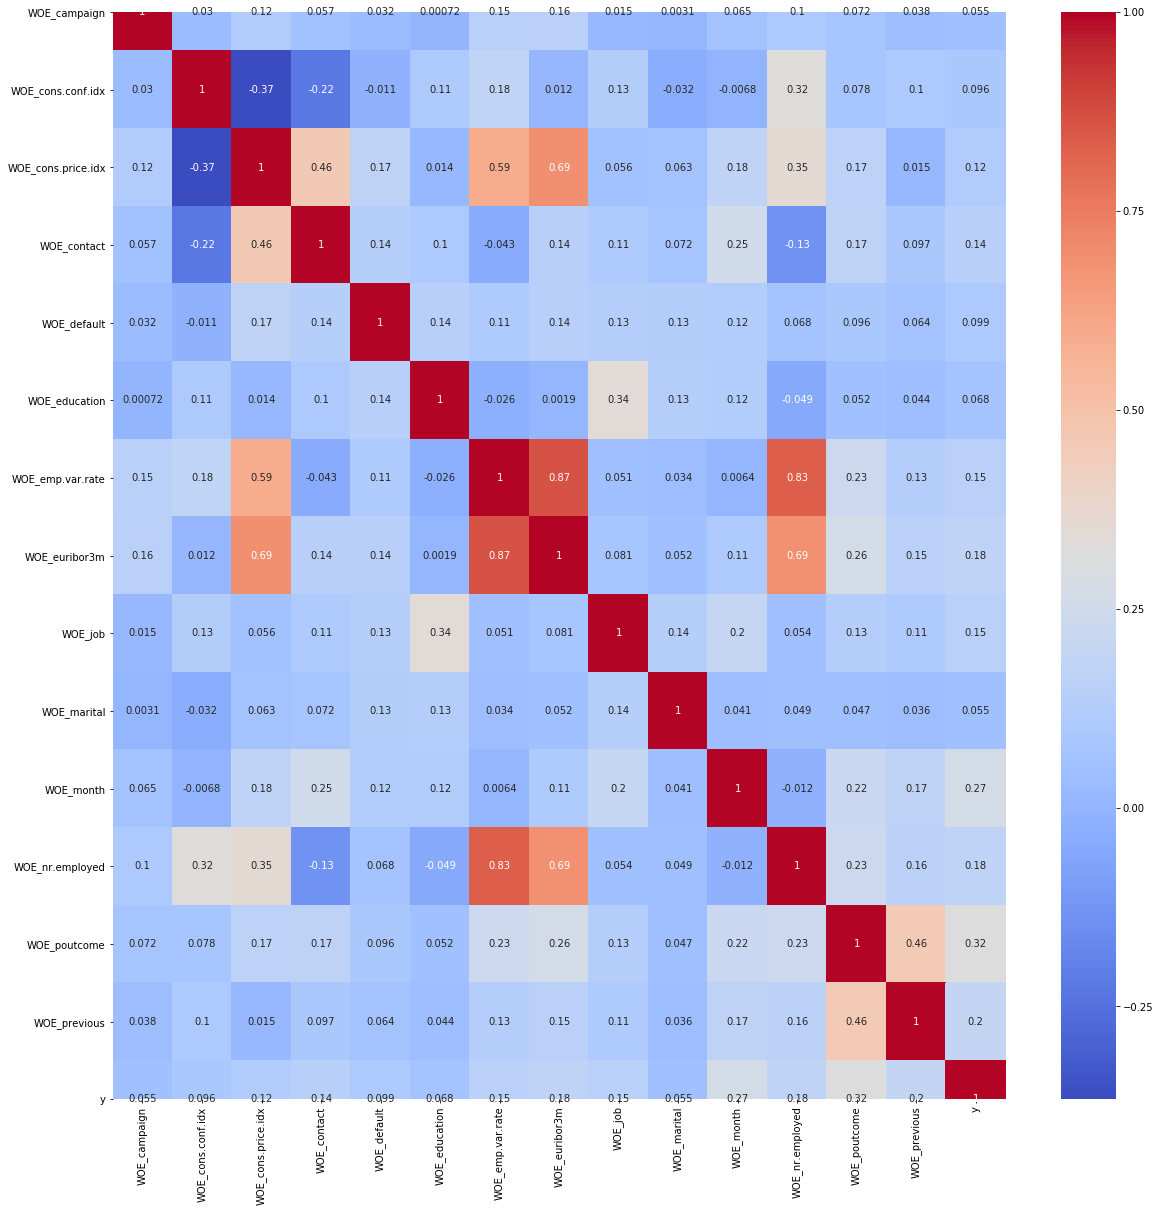

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(baf.corr(), cmap = 'coolwarm',annot=True)

## 4. Modelling

I will try several modelling method for finding the best model to predict term-deposit subscriber. I will try Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and Neural Network

### 4.1 Logistic Regression Model

As mentioned before, for logistic regression I have to exclude the highly correlated predictor, so I will exclude **WOE_euribor3m** and **WOE_emp.var.rate'**

In [18]:
X = baf.drop(['WOE_euribor3m','WOE_emp.var.rate','y'],axis=1)
y = baf['y']

In [19]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.3,random_state=101)

Importing LogisticRegression, fit it to the train data, and predict for the test data. Prediction will be compared to the y_test to get classification matrix

In [20]:
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression()
LogModel.fit(X_train_log,y_train_log)
log_prediction_train = LogModel.predict(X_train_log)
log_prediction_test = LogModel.predict(X_test_log)

C:\Users\GL552VW\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.2 Decision Tree Model

Splitting the data to train and test data set

In [21]:
X = baf.drop('y',axis=1)
y = baf['y']

In [22]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.5,random_state=101)

Importing DecisionTreeClassifier() to develop model based on decision tree algorithm and use it to predict.

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_leaf_nodes=10)
dt_model.fit(X_train_dt,y_train_dt)

dt_prediction_train = dt_model.predict(X_train_dt)
dt_prediction_test = dt_model.predict(X_test_dt)

### 4.3 Random Forest Model

Splitting the data to train and test data set

In [24]:
X = baf.drop('y',axis=1)
y = baf['y']

In [25]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3,random_state=101)

Compiling model using Random Forest Algorithm.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=600,max_leaf_nodes=10)
rf_model.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The model used to predict train dataset and test dataset

In [28]:
rf_prediction_train = rf_model.predict(X_train_rf)
rf_prediction_test = rf_model.predict(X_test_rf)

### 4.4 Support Vector Machine Model

In [ ]:
X = baf.drop('y',axis=1).values
y = baf['y'].values

Splitting the data to train data and test data

In [ ]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.3, random_state=101)

The data should be scaled first

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_svc)

In [ ]:
X_train_svc = scaler.transform(X_train_svc)
X_test_svc = scaler.transform(X_test_svc)

Then model compiled with best C and gamma that I find using grid search

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_svc,y_train_svc)

After compiled, the model used to predict the test data set  

In [ ]:
svc_prediction_train = grid.predict(X_train_svc)
svc_prediction_test = grid.predict(X_test_svc)

### 4.5 TensorFlow Keras Neural Network Model

Keras model only receive data in numpy array format. So for this model I will declare X and y by the values

In [ ]:
X = baf.drop('y',axis=1).values
y = baf['y'].values

Splitting the data to train data and test data

In [ ]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.3, random_state=101)

Before using the data, data must be scaled first

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_tf)

In [ ]:
X_train_tf = scaler.transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

Importing tensorflow, sequential, dense, and dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Now I'm going to build the model. Because it is binary classification, the last layer should be 1 node only and the last activation function should be sigmoid so the output will be between 0 and 1.

In [ ]:
model_tf = Sequential()

model_tf.add(Dense(units = 15,activation='sigmoid'))
model_tf.add(Dense(units = 8,activation='sigmoid'))
model_tf.add(Dense(units = 4,activation='sigmoid'))
model_tf.add(Dense(units = 2,activation='sigmoid'))
model_tf.add(Dense(units = 1,activation = 'sigmoid'))

model_tf.compile(loss='binary_crossentropy',optimizer='adam')

After compiling model, I'm going to use callbacks for early stopping before the model get overfitting

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Model has been compiled and ready to trained.

In [ ]:
model_tf.fit(x=X_train_tf, 
             y=y_train_tf, 
             epochs=1000,
             validation_data=(X_test_tf, y_test_tf),verbose=1,
             callbacks=[early_stop])

To cross-check either the model overfitting or not, I plot loss on the training data and test data

In [ ]:
model_loss = pd.DataFrame(model_tf.history.history)
model_loss.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss, Val_loss')
plt.title('Loss,Val_loss vs Epoch')

Because the model seems work well enough where the val_loss flatten and it means it does not overfit the training data, we could use it to predict the test data set

In [ ]:
tf_prediction = model_tf.predict_classes(X_test_tf)

### 4.6 XGBoost Model

In [71]:
from xgboost import XGBClassifier

In [72]:
model = XGBClassifier()

In [73]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [74]:
pred = model.predict(X_test)

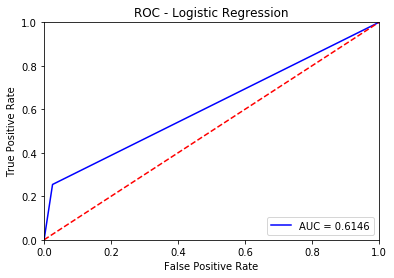

Gini = 22.9175


In [75]:
roc_auc_test = roc_auc_score(y_test,pred)

fpr, tpr, thresholds = roc_curve(y_test,pred)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

## 5. Evaluating Model

After predict X_test using several algorithm, I will check model's performance using **classification report** and **confusion matrix**

### 5.1 Logistic Regression Model

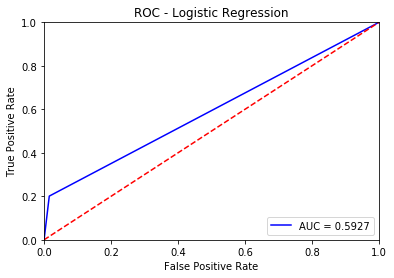

Gini = 18.5430


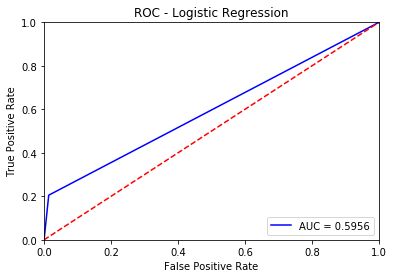

Gini = 19.1298


In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc_train = roc_auc_score(y_train_log,log_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_log,log_prediction_train)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % log_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(log_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)



log_roc_auc_test = roc_auc_score(y_test_log,log_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_log,log_prediction_test)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % log_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(log_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The accuracy of logistic regression model is around 90% with AUC around 0.57

### 5.2 Decision Tree Model

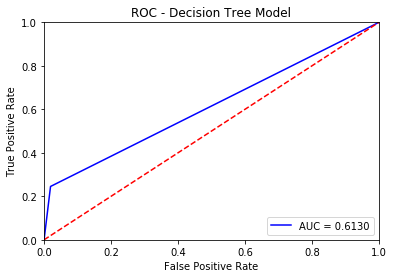

Gini = 22.6039


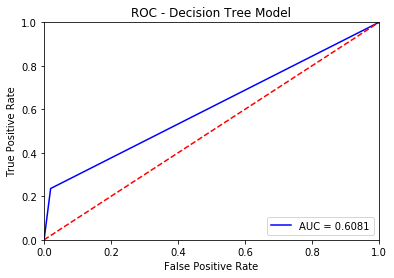

Gini = 21.6261


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc_train = roc_auc_score(y_train_dt,dt_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_dt,dt_prediction_train)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % dt_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(dt_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


dt_roc_auc_test = roc_auc_score(y_test_dt,dt_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_dt,dt_prediction_test)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % dt_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree Model')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(dt_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The accuracy of Decision Tree Model is around 84 and AUC = 0.61

### 5.3 Random Forest Model

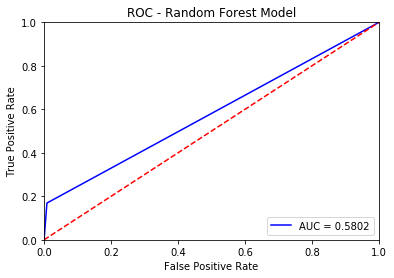

Gini = 16.0483


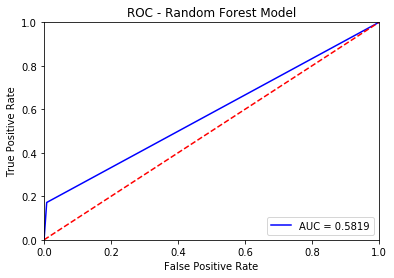

Gini = 16.3814


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc_train = roc_auc_score(y_true=y_train_rf,y_score=rf_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_rf,rf_prediction_train)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % rf_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(rf_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


rf_roc_auc_test = roc_auc_score(y_true=y_test_rf,y_score=rf_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_rf,rf_prediction_test)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % rf_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(rf_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The accuracy of Random Forest Model is around 89% and AUC = 0.63

### 5.4 Support Vector Machine Model

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc_train = roc_auc_score(y_true=y_train_svc,y_score=svc_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_svc,svc_prediction_train)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % svc_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*(svc_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


svc_roc_auc_test = roc_auc_score(y_test_svc,svc_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_svc,svc_prediction_test)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % svc_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM Model')
plt.legend(loc="lower right")
plt.show() 


gini = 2*(svc_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The accuracy of support vector machine model is around 90% and AUC = 0.58  

### 5.5 TensorFlow Keras Neural Network Model

In [ ]:
print(classification_report(y_test_tf,tf_prediction))

In [ ]:
print(confusion_matrix(y_test_tf,tf_prediction))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tf_roc_auc = roc_auc_score(y_test_tf,tf_prediction)

fpr, tpr, thresholds = roc_curve(y_test_tf,tf_prediction)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % tf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Neural Network')
plt.legend(loc="lower right")
plt.grid()
plt.show() 


gini = 2*(tf_roc_auc-0.5)
print('Gini = %0.4f'% gini)

The accuracy of Neural Network model is around 88% and AUC = 0.71

## 6. Conclusion 

Refering the model algorithm I used, the model who has best prediction is Logistic Regression and Support Vector Machine with 90% accuracy but Neural Network gives the best AUC with score 0.71. But due to the customer's group based on their subscriber is **heavily concentrated** to the ones who don't subscribe, I think the better way to see the model performance is using the AUC, so for my data mining process in this project the Neural Network Model gives best performance. Yet, this result still could be developed more by doing more feature engineering, or parameter (C and gamma) in SVM, or maybe for neural network model I need to explore more the possibility of nodes, dense, layer, activation function, etc. 